In [36]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a synthetic temporal graph
def generate_temporal_graph(num_nodes, num_edges, time_steps):
    """
    Generate a synthetic temporal graph with random edges and timestamps.
    """
    graph = nx.Graph()
    edges = []
    
    for _ in range(num_edges):
        src = np.random.randint(0, num_nodes)
        dst = np.random.randint(0, num_nodes)
        timestamp = np.random.randint(0, time_steps)
        edges.append((src, dst, {'timestamp': timestamp}))
    
    graph.add_edges_from(edges)
    return graph

# Extract temporal features for each node
def extract_temporal_features(graph, time_steps):
    """
    Extract temporal features for each node in the graph.
    Features include:
    - Number of interactions per time step
    - Average time between interactions
    - Total number of interactions
    """
    node_features = {}
    
    for node in graph.nodes():
        # Get all edges involving this node
        edges = [e for e in graph.edges(node, data=True)]
        timestamps = [e[2]['timestamp'] for e in edges]
        
        # Temporal features
        num_interactions = len(timestamps)
        if num_interactions > 0:
            avg_time_between = (max(timestamps) - min(timestamps)) / num_interactions
        else:
            avg_time_between = 0
        
        # Store features
        node_features[node] = {
            'num_interactions': num_interactions,
            'avg_time_between': avg_time_between
        }
    
    return pd.DataFrame.from_dict(node_features, orient='index')

# Simulate fraud labels (for demonstration purposes)
def generate_fraud_labels(graph, fraud_prob=0.2):
    """
    Randomly assign fraud labels to nodes.
    """
    labels = {}
    for node in graph.nodes():
        labels[node] = 1 if np.random.rand() < fraud_prob else 0  # 1 = fraud, 0 = not fraud
    return pd.Series(labels)

# Main script
if __name__ == "__main__":
    # Parameters
    num_nodes = 100
    num_edges = 500
    time_steps = 10
    
    # Generate synthetic temporal graph
    graph = generate_temporal_graph(num_nodes, num_edges, time_steps)
    
    # Extract temporal features
    features = extract_temporal_features(graph, time_steps)
    
    # Generate synthetic fraud labels
    labels = generate_fraud_labels(graph)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    
    # Train a simple classifier (Logistic Regression)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


Accuracy: 1.00


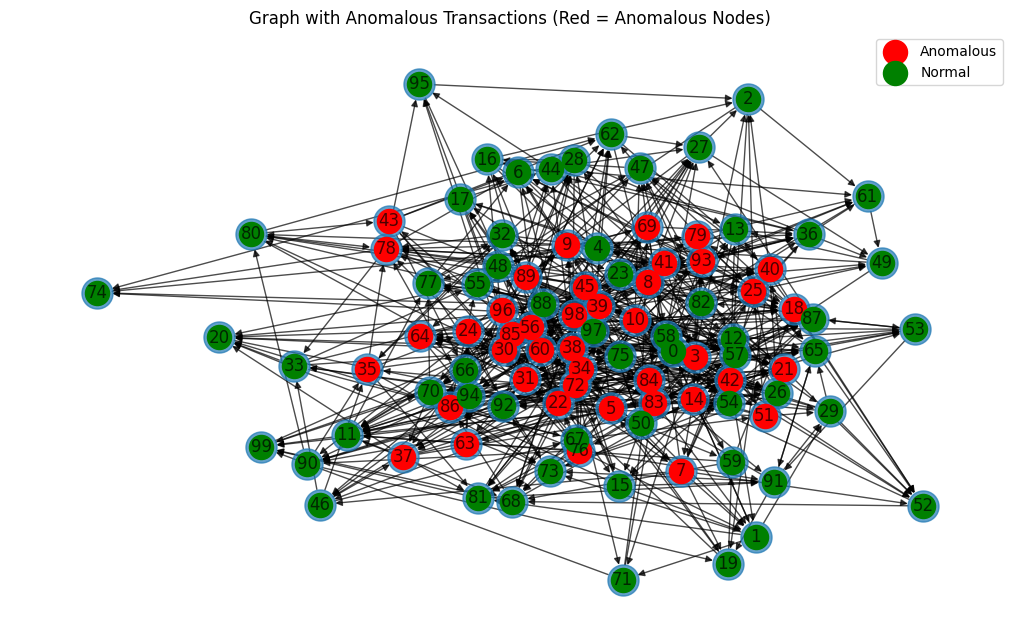

In [38]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a complex temporal graph
def generate_complex_temporal_graph(num_nodes, num_edges, time_steps):
    G = nx.DiGraph()
    for _ in range(num_edges):
        src = np.random.randint(0, num_nodes)
        dst = np.random.randint(0, num_nodes)
        if src != dst:
            timestamp = np.random.randint(0, time_steps)
            weight = np.random.randint(1, 10)  # Representando volume da transação
            G.add_edge(src, dst, timestamp=timestamp, weight=weight)
    return G

# Extract node features
def extract_features(G):
    node_features = {}
    for node in G.nodes():
        edges = list(G.out_edges(node, data=True))
        timestamps = [e[2]['timestamp'] for e in edges]
        weights = [e[2]['weight'] for e in edges]
        num_interactions = len(edges)
        total_weight = sum(weights) if weights else 0
        avg_weight = total_weight / num_interactions if num_interactions > 0 else 0
        avg_time_between = (max(timestamps) - min(timestamps)) / num_interactions if num_interactions > 1 else 0
        
        node_features[node] = {
            'num_interactions': num_interactions,
            'total_weight': total_weight,
            'avg_weight': avg_weight,
            'avg_time_between': avg_time_between
        }
    return pd.DataFrame.from_dict(node_features, orient='index')

# Generate anomaly labels
def generate_anomaly_labels(features, threshold=5):
    return (features['num_interactions'] > threshold).astype(int)

# Main execution
num_nodes = 100
num_edges = 600
time_steps = 15

graph = generate_complex_temporal_graph(num_nodes, num_edges, time_steps)
features = extract_features(graph)
labels = generate_anomaly_labels(features)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=500, alpha=0.7)
nx.draw_networkx_nodes(graph, pos, nodelist=labels[labels == 1].index.tolist(), node_color='r', label='Anomalous')
nx.draw_networkx_nodes(graph, pos, nodelist=labels[labels == 0].index.tolist(), node_color='g', label='Normal')
plt.legend()
plt.title("Graph with Anomalous Transactions (Red = Anomalous Nodes)")
plt.show()


In [23]:

import networkx as nx
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a more complex synthetic temporal graph
def generate_complex_temporal_graph(num_nodes, num_edges, time_steps):
    """
    Generate a more complex synthetic temporal graph with weighted edges,
    communities, and varied interaction frequencies.
    """
    graph = nx.Graph()
    edges = []
    
    # Create community structure
    communities = {i: i // (num_nodes // 5) for i in range(num_nodes)}
    
    for _ in range(num_edges):
        src = np.random.randint(0, num_nodes)
        dst = np.random.randint(0, num_nodes)
        while communities[src] != communities[dst] and np.random.rand() > 0.2:
            dst = np.random.randint(0, num_nodes)  # Prefer intra-community edges
        timestamp = np.random.randint(0, time_steps)
        weight = np.random.rand() * 10  # Random weight between 0 and 10
        edges.append((src, dst, {'timestamp': timestamp, 'weight': weight}))
    
    graph.add_edges_from(edges)
    return graph

# Extract temporal and weighted features
def extract_features(graph):
    """
    Extract temporal and weighted features for each node.
    """
    node_features = {}
    
    for node in graph.nodes():
        edges = [e for e in graph.edges(node, data=True)]
        timestamps = [e[2]['timestamp'] for e in edges]
        weights = [e[2]['weight'] for e in edges]
        
        num_interactions = len(timestamps)
        avg_time_between = (max(timestamps) - min(timestamps)) / num_interactions if num_interactions > 0 else 0
        total_weight = sum(weights)
        avg_weight = np.mean(weights) if num_interactions > 0 else 0
        
        node_features[node] = {
            'num_interactions': num_interactions,
            'avg_time_between': avg_time_between,
            'total_weight': total_weight,
            'avg_weight': avg_weight
        }
    
    return pd.DataFrame.from_dict(node_features, orient='index')

# Simulate fraud labels
def generate_fraud_labels(graph, fraud_prob=0.2):
    labels = {node: 1 if np.random.rand() < fraud_prob else 0 for node in graph.nodes()}
    return pd.Series(labels, name='fraud')

# Main script
if __name__ == "__main__":
    num_nodes = 150
    num_edges = 800
    time_steps = 20
    
    graph = generate_complex_temporal_graph(num_nodes, num_edges, time_steps)
    features = extract_features(graph)
    labels = generate_fraud_labels(graph)
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Visualization
    pos = nx.spring_layout(graph, seed=42)
    node_colors = ['red' if labels[node] == 1 else 'blue' for node in graph.nodes()]
    node_sizes = [features.loc[node, 'total_weight'] * 5 for node in graph.nodes()]
    
    fig = px.scatter(
        x=[pos[node][0] for node in graph.nodes()],
        y=[pos[node][1] for node in graph.nodes()],
        color=node_colors,
        size=node_sizes,
        labels={'color': 'Fraud', 'size': 'Total Weight'},
        title='Graph Visualization with Fraud Labels'
    )
    fig.show()


Accuracy: 0.78


In [30]:
import plotly.graph_objects as go
import networkx as nx

# Criando um grafo de exemplo
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

edge_x = []
edge_y = []
edge_colors = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    
    # Definição de cores (exemplo: destacando algumas arestas)
    if edge[2].get('weight', 1) > 2:
        edge_colors.append('red')
    else:
        edge_colors.append('gray')

# Criando múltiplos Scatter para cada cor
edge_traces = []
unique_colors = set(edge_colors)

for color in unique_colors:
    x_vals = []
    y_vals = []
    for i, c in enumerate(edge_colors):
        if c == color:
            x_vals.extend([edge_x[3*i], edge_x[3*i+1], None])
            y_vals.extend([edge_y[3*i], edge_y[3*i+1], None])
    
    edge_traces.append(go.Scatter(
        x=x_vals, y=y_vals,
        line=dict(width=1, color=color),
        hoverinfo='none',
        mode='lines'
    ))

node_x = []
node_y = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=10, color='blue'),
    hoverinfo='text'
)

fig = go.Figure()
for trace in edge_traces:
    fig.add_trace(trace)
fig.add_trace(node_trace)

fig.update_layout(showlegend=False)
fig.show()


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate a complex temporal graph with noise
def generate_complex_temporal_graph(num_nodes, num_edges, time_steps):
    G = nx.DiGraph()
    for _ in range(num_edges):
        src = np.random.randint(0, num_nodes)
        dst = np.random.randint(0, num_nodes)
        if src != dst:
            timestamp = np.random.randint(0, time_steps)
            weight = np.random.randint(1, 10)  # Representando volume da transação
            # Adicionar ruído ao peso
            weight += np.random.normal(0, 2)  # Ruído com média 0 e desvio padrão 2
            G.add_edge(src, dst, timestamp=timestamp, weight=max(1, int(weight)))  # Garantir peso positivo
    return G

# Extract node features
def extract_features(G):
    node_features = {}
    for node in G.nodes():
        edges = list(G.out_edges(node, data=True))
        timestamps = [e[2]['timestamp'] for e in edges]
        weights = [e[2]['weight'] for e in edges]
        num_interactions = len(edges)
        total_weight = sum(weights) if weights else 0
        avg_weight = total_weight / num_interactions if num_interactions > 0 else 0
        avg_time_between = (max(timestamps) - min(timestamps)) / num_interactions if num_interactions > 1 else 0
        
        node_features[node] = {
            'num_interactions': num_interactions,
            'total_weight': total_weight,
            'avg_weight': avg_weight,
            'avg_time_between': avg_time_between
        }
    return pd.DataFrame.from_dict(node_features, orient='index')

# Generate anomaly labels with a more realistic distribution
def generate_anomaly_labels(features, threshold=5, anomaly_prob=0.1):
    # Definir anomalias com base no número de interações e uma probabilidade adicional
    anomalies = (features['num_interactions'] > threshold).astype(int)
    # Adicionar ruído: alguns nós normais são marcados como anômalos e vice-versa
    noise = np.random.choice([0, 1], size=len(features), p=[1 - anomaly_prob, anomaly_prob])
    return (anomalies + noise) % 2  # Garantir que os valores sejam 0 ou 1

# Main execution
num_nodes = 200  # Aumentar o número de nós para mais dados
num_edges = 1200  # Aumentar o número de arestas
time_steps = 20  # Aumentar o número de passos de tempo

# Gerar o grafo e extrair características
graph = generate_complex_temporal_graph(num_nodes, num_edges, time_steps)
features = extract_features(graph)

# Gerar rótulos de anomalia com uma distribuição mais realista
labels = generate_anomaly_labels(features, threshold=5, anomaly_prob=0.1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Treinar o modelo de Random Forest
clf = RandomForestClassifier(random_state=42)

# Avaliar o modelo com validação cruzada
cv_scores = cross_val_score(clf, features, labels, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {np.mean(cv_scores):.2f} (±{np.std(cv_scores):.2f})")

# Treinar o modelo no conjunto de treino completo
clf.fit(X_train, y_train)

# Prever anomalias para todos os nós
y_pred_all = clf.predict(features)

# Criar um layout para o grafo
pos = nx.spring_layout(graph)

# Preparar dados para o gráfico interativo
edge_trace = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None], y=[y0, y1, None],
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'))

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left'
            
        ),
        line=dict(width=2)))

# Adicionar informações aos nós
for node in graph.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_info = (
        f"Node: {node}<br>"
        f"Interactions: {features.loc[node, 'num_interactions']}<br>"
        f"Total Weight: {features.loc[node, 'total_weight']}<br>"
        f"Avg Weight: {features.loc[node, 'avg_weight']:.2f}<br>"
        f"Avg Time Between: {features.loc[node, 'avg_time_between']:.2f}<br>"
        f"Anomalous: {'Yes' if y_pred_all[node] == 1 else 'No'}"
    )
    node_trace['text'] += tuple([node_info])

# Colorir nós anômalos de vermelho e normais de verde
node_trace['marker']['color'] = ['red' if y_pred_all[node] == 1 else 'green' for node in graph.nodes()]

# Criar o gráfico interativo
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='Graph with Anomalous Transactions (Red = Anomalous Nodes)',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Mostrar o gráfico interativo
fig.show()

# Avaliar o modelo no conjunto de teste
y_pred_test = clf.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Test set precision: {precision_score(y_test, y_pred_test):.2f}")
print(f"Test set recall: {recall_score(y_test, y_pred_test):.2f}")
print(f"Test set F1-score: {f1_score(y_test, y_pred_test):.2f}")

''' 
Model takes into consideration:

The number of interactions;

The total volume of transactions;

The average weight of transactions;

The average time between interactions.'''

Cross-validation accuracy: 0.84 (±0.03)


Test set accuracy: 0.90
Test set precision: 0.91
Test set recall: 0.91
Test set F1-score: 0.91
